In [30]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [385]:
# data_path = "/home/m_r1117/Desktop/Toufik/Practice/Indexing/Benchmark_Data/DEEP/base.10M.fbin"
# vecs,dim = read_data_from_fbin_and_ibin.read_fbin(data_path)

In [2]:
df = pd.read_csv('/home/ubq3/test1_debug_trans.csv')

In [3]:
df.shape

(2048, 12544)

In [4]:
vectors = df.to_numpy()

In [386]:

# np.random.seed(42)

rndperm = np.random.permutation(vecs.shape[0])

N = 50000
vectors = vecs[rndperm[:N],:].copy()

In [18]:
vectors.shape

(2048, 12544)

In [19]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [15]:
t= time.time()
X = StandardScaler().fit_transform(vectors)
print('Fit transform time: ', time.time()-t)

t= time.time()
db = DBSCAN(eps=120, min_samples=10).fit(X)
print('Fit time: ', time.time()-t)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

Fit transform time:  0.30054759979248047
Fit time:  0.4045414924621582


In [31]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('N CLUSTER:',n_clusters_)

N CLUSTER: 6


In [16]:
labels.shape

(2048,)

In [17]:
type(labels)

numpy.ndarray

In [20]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2048 samples in 0.008s...
[t-SNE] Computed neighbors for 2048 samples in 0.234s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2048
[t-SNE] Computed conditional probabilities for sample 2000 / 2048
[t-SNE] Computed conditional probabilities for sample 2048 / 2048
[t-SNE] Mean sigma: 16.644177
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.159019
[t-SNE] KL divergence after 300 iterations: 1.059788


In [21]:
tsne_results.shape

(2048, 2)

In [22]:
type(tsne_results)

numpy.ndarray

In [23]:
def scale_to_01_range(x):
    # compute the distribution range
    value_range = (np.max(x) - np.min(x))

    # move the distribution so that it starts from zero
    # by extracting the minimal value from all its values
    starts_from_zero = x - np.min(x)

    # make the distribution fit [0; 1] by dividing by its range
    return starts_from_zero / value_range

In [24]:
tx = scale_to_01_range(tsne_results[:,0])
ty = scale_to_01_range(tsne_results[:,1])

In [25]:
df['tsne-2d-one'] = tx
df['tsne-2d-two'] = ty

In [26]:
df['label']=labels

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

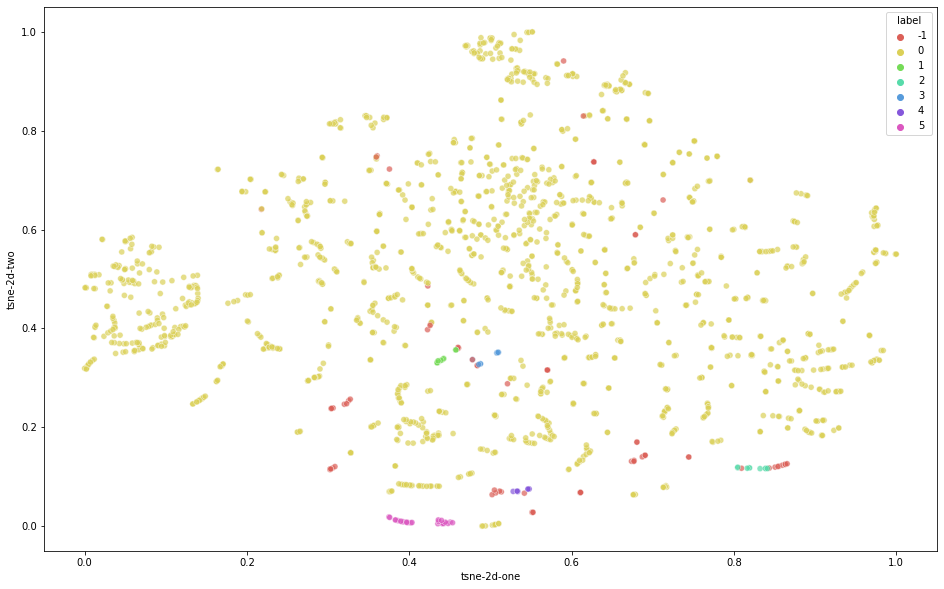

In [37]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", n_clusters_+1),
    data=df,
    legend="full",
    alpha=0.7
)